<a href="https://colab.research.google.com/github/adeeconometrics/literate-programming/blob/main/Probability_Distributions_Continuous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO
Improve template it should be 

- section
    - brief description {assumptions, use-cases}
    - definition & parameters with definition on their bounds
    - implementation 
        - naive method
        - symbolic method
        - numerical method

# Continuous Probability Distributions
by Dave Amiana

The purpose of this notebook is to introduce and explore some probability models for continuous variabbles; this can be seen as an extension of models in the discrete space.

The following probability distributions that we shall explore in this notebook are listed as follows:

- Normal-distribution
    - standard normal distribution
- t-distribution
    - Cauchy distribution:: TODO
- F-distribution
- $\chi^2$ distribution
- $\Gamma$ distribution
- Pareto distribution
- Log-Normal distribution
- Non-central $\chi^2$ distribution

We will explore the derivation of these distributions, their motvation, assumptions, and applications. 

In [ ]:
# import relevant packages
import matplotlib.pyplot as plt
import numpy as np
from sympy import init_printing, lambdify, N, gamma, beta, oo
import sympy as sp
import scipy as sci
import scipy.integrate as integrate 
import scipy.special as ss

sp.init_printing() 

In [ ]:
x,y,z = sp.symbols('x,y,z')

#Fundamental Functions

Before we begin our exploration with implementing probability distirbutions functionally, we are welcomed with the following functions and their corresponding definitions. 

- gamma function
$${\displaystyle \Gamma (z)=\int _{0}^{\infty }x^{z-1}e^{-x}\,dx,\ \qquad \Re (z)>0\ .}$$
- beta function
$${\displaystyle \mathrm {B} (x,y)=\int _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt}$$
- incomplete gamma function
    - upper incomplete 
    $$ \Gamma(s,x) = \int_x^{\infty} t^{s-1}e^{-t}{\rm d}t $$
    - lower incomplete
    $$  \gamma(s,x) = \int_0^x t^{s-1} e^{-t}\{\rm d}t $$
- incomplete beta function
$${\displaystyle \mathrm {B} (x;\,a,b)=\int _{0}^{x}t^{a-1}\,(1-t)^{b-1}\,dt}$$

### $\Gamma$-function:

$$\Gamma(x) := \int^{\infty}_{0} t^{x-1} e^{-t} \mathrm{d}t.$$

In [ ]:
# naive symbolic implementation
def g(x):
    return N(sp.Integral(t**(x-1)*E**(- t),(t,0, oo)))
g(sp.pi)

In [ ]:
# implementation in Sympy
N(gamma(pi))

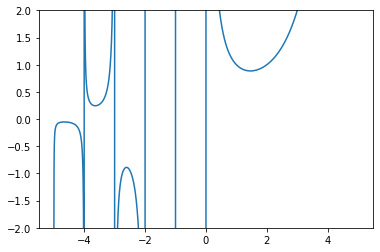

In [ ]:
# plotting the gamma function using scipy

x = np.linspace(-5, 5, 10000)
γ = np.array([gamma(i) for i in x])

plt.plot(x, γ)
plt.ylim(-2,2)

In [ ]:
# naive numerical method for Gamma function
def gamma(x):
    g = lambda _x,t: t**(_x-1)*np.exp(-t**2)
    return sci.integrate.quad(g, 0, np.inf, args=x)

gamma(np.pi)

OverflowError: ignored

In [ ]:
# Γ function definition of PDF
expr = (sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*(sp.gamma(df/2))))*(1+(t**2/df))**(-(df+1)/2)
k = sp.lambdify([df,t], expr, "sympy")
res  = k(1,.1)
N(res)

### The $\beta$ - function:
$${\displaystyle \mathrm {B} (x,y)=\int _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt}$$

In [ ]:
# β function definition of PDF
B  = lambda x_0, y_0: sp.Integral(t**(x_0-1)*(1-t)**(y_0-1), (t,0,1))
N(B(3,4))

In [ ]:
# β function implementation in SymPy
N(sp.beta(3,4))

In [ ]:
# numerical method: FIX THIS
def beta(x_0,y_0):
    expr = lambda x0,y0,t0: t0**(x0-1)*(1-t0)**(y0-1)
    return sci.integrate.quad(expr, 0,1, args=(x_0,y_0))

In [ ]:
beta(3,4)

In [ ]:
sci.special.beta(3,4)

## Continuous Uniform Distribution

#### Definition

Probability Density Function
$$f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}}$$

parameters:
- $-\infty< a<b < \infty$ boundary of the distribution
- $x$ random variable
----
Cumulative Distribution Function
$$F(x)={\begin{cases}0&{\text{for }}x<a\\[8pt]{\frac {x-a}{b-a}}&{\text{for }}a\leq x\leq b\\[8pt]1&{\text{for }}x>b\end{cases}}$$

parameters:
- $-\infty< a<b < \infty$ boundary of the distribution
- $x$ random variable

In [ ]:
def uniform_dist_pdf(a,b, x):
    if (x<a or x>b):
        return 0
    else:
        return 1/(b-a)

def uniform_dist_cdf(a,b, x):
    if (x<a):
        return 0
    elif (x>b):
        return 1
    else: 
        return (x-a)/(b-a)

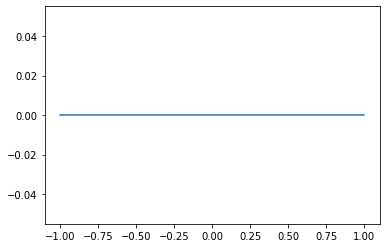

In [ ]:
# visualizing pdf

a=3;b=5;x_val = 1
x_unif = np.linspace(-x_val, x_val, 100)
y_unif_pdf = np.array([uniform_dist_pdf(a,b,i) for i in x_unif])

plt.plot(x_unif, y_unif_pdf)

In [ ]:
np.cumsum(y_unif_pdf)[-1] # should be very close to 1

0

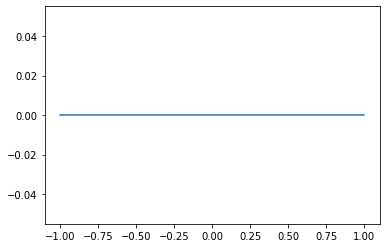

In [ ]:
# visualizing cdf
y_unif_cdf = np.array([uniform_dist_cdf(a,b,i) for i in x_unif])

plt.plot(x_unif, y_unif_pdf)

In [ ]:
y_unif_cdf[-1]  # should be very close to 1

0

## The Normal Distribution

Definition

Probability Density Function
$${\displaystyle {\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

parameters:
- $\mu$ - mean
- $x$ - random variable
- $\sigma$ - standard deviation
----
Cumulative Distribution Function
$${\displaystyle \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int _{-\infty }^{x}e^{-t^{2}/2}\,dt}$$

parameter:
- $x$ - random variable

The above integral cannot be expressed in terms of elementary functions, and are often said to be [special functions](https://en.wikipedia.org/wiki/Special_function). 

In [ ]:
def normal_dist_f(x):
    return 1/(np.sqrt(2*np.pi))*np.power(np.e, -1/2*x**2)

In [ ]:
# PDF given x
def norm_dist_pdf(x, mean, std):
    return (1/(np.sqrt(2*np.pi * np.power(std, 2))))* np.power(np.e, -(np.power((x - mean), 2) / (2 * np.power(std, 2))))

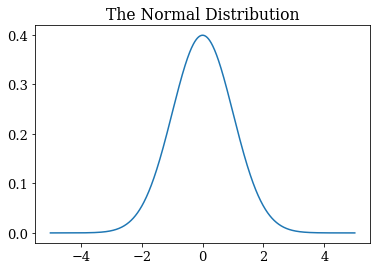

In [ ]:
# plotting the pdf
mean = 0; std = 1
x_norm = np.linspace(-5,5,1000)
y_norm_f =  np.array([norm_dist_pdf(x_i, mean, std) for x_i in x_norm])

plt.title("The Normal Distribution")
plt.plot(x_norm,y_norm_f)

In [ ]:
np.cumsum(y_norm_f)[-1]

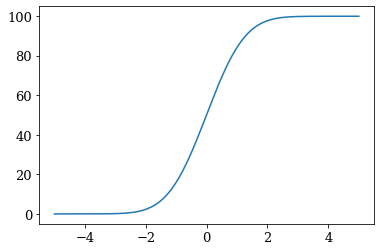

In [ ]:
plt.plot(x_norm,np.cumsum(y_norm_f))

In [ ]:
# introduce relevant symbol
t = sp.symbols("t")

In [ ]:
# CDF - test this function
def norm_dist_cdf(*x_0, lower="-oo", upper=None):
    if(upper==None):
        cdf = 1/(sp.sqrt(2*sp.pi))* sp.integrate(sp.exp(-t/2),(x, lower, x_0))
        return cdf
    else:
        cdf = 1/(sp.sqrt(2*sp.pi))* sp.integrate(sp.exp(-t/2),(x, lower, upper))
        return cdf

In [ ]:
N(norm_dist_cdf(upper=oo))

In [ ]:
sp.exp(-1/2)

In [ ]:
#numerical method 
def norm_dist_cdf_num(*x_0, lower=-np.inf, upper=None):
    _expr = lambda _t: np.exp(-_t/2)
    if(upper==None):
        cdf = 1/(np.sqrt(2*np.pi))* sci.integrate.quad(_expr, lower,upper)[0]
        return cdf
    else:
        cdf = 1/(np.sqrt(2*np.pi))* (sci.integrate.quad(_expr, lower,upper)[0])
        return cdf

In [ ]:
norm_dist_cdf_num(0)

TypeError: ignored

In [ ]:
# plotting CDF
def norm_dist_cdf_plot(_x):
    pass

In [ ]:
# transforming normal distributions to standard normal through z-scores


## T distribution

Definition

Probability Density Function
$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}},\!$$

where $v$ is the number of degrees of freedom and $\Gamma$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function).

The density function of the t-distribution may also be written in terms of the $\beta$ -function. 

$$f(t) = \frac{1}{\sqrt{\nu}\,\mathrm{B} (\frac{1}{2}, \frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!,$$

where B is the [beta-function](https://en.wikipedia.org/wiki/Beta_function). 

----
Cumulative Distribution Function:

The cumulative distribution function can be written in terms of I, the regularized incomplete beta function. For t > 0,

$${\displaystyle F(t)=\int _{-\infty }^{t}f(u)\,du=1-{\tfrac {1}{2}}I_{x(t)}\left({\tfrac {\nu }{2}},{\tfrac {1}{2}}\right),}$$

where

$$x(t) = \frac{\nu}{{t^2+\nu}}$$

Other values would be obtained by symmetry. An alternative formula, valid for $t^2 < \nu$, is

$${\displaystyle \int _{-\infty }^{t}f(u)\,du={\tfrac {1}{2}}+t{\frac {\Gamma \left({\tfrac {1}{2}}(\nu +1)\right)}{{\sqrt {\pi \nu }}\,\Gamma \left({\tfrac {\nu }{2}}\right)}}\,{}_{2}F_{1}\left({\tfrac {1}{2}},{\tfrac {1}{2}}(\nu +1);{\tfrac {3}{2}};-{\tfrac {t^{2}}{\nu }}\right),}$$

where $_ 2F_1$ is a particular case of the hypergeometric function.

For implementing this distribution, we will use a library in SymPy to define the gamma function and beta-function symbolically. 


In [ ]:
# introduct symbols
df, t = sp.symbols("v, t")

### PDF of T-distribution
$$f(t) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{t^2}{\nu} \right)^{\!-\frac{\nu+1}{2}}\!$$

In [ ]:
# definition of the pdf - for graphing the distirbution
def t_dist_pdf(df, t):
    val = sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*sp.gamma(df/2))*(1+(t**2/df))**(-((df+1)/2))
    return N(val)

In [ ]:
# numerical method

### CDF of T-distribution
$$\int_{-\infty}^{t} f(x,t) dt$$

In [ ]:
# definition of the cmf -  for finding the probability values
def t_dist_cdf(df, *a, lower = "-oo", upper=None):
    expr = sp.gamma((df+1)/2)/(sp.sqrt(df*sp.pi)*sp.gamma(df/2))*(1+(t**2/df))**(-((df+1)/2))
    if(upper==None):
        val = sp.Integral(expr, (t,lower,a))
    if(upper!=None):
         val = sp.Integral(expr, (t,lower,upper))
    return N(val)

# t_dist_cdf(10, lower=-1, upper=1)

In [ ]:
# to-do: improve function as lambda function with loc and scale, and shading
# plotting the t-distribution
from scipy.special import gamma 

def t_dist_np(x, t=0): # loc, scale, df
    val = gamma((x+1)/2)/(np.sqrt(x*np.pi)*gamma(x/2))*(1+(t**2/x))**(-((x+1)/2))
    return val

x = np.linspace(-5,5, 10000)
y = np.array([t_dist_np(1,i) for i in x])

plt.plot(x,y)

### F-distribution
Fisher–Snedecor distribution (after Ronald Fisher and George W. Snedecor) is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance (ANOVA), e.g., F-test.

----
Definition:


Probability Density Function:

If a random variable $X$ has an F-distribution with parameters $d_1$ and $d_2$, we write X~F(d₁,d₂). Then the probability density function for X is given by:

$${\displaystyle {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}}}$$

for real x>0. Where B is the beta function. 

Cummulative Density Function:

$$F(x;d_{1},d_{2})=I_{{{\frac  {d_{1}x}{d_{1}x+d_{2}}}}}\left({\tfrac  {d_{1}}{2}},{\tfrac  {d_{2}}{2}}\right),$$
where I is the regularized [incomplete beta function](https://en.wikipedia.org/wiki/Regularized_incomplete_beta_function).


In [ ]:
# initialize symbols
a,b = sp.symbols("a b")

### Incomplete $\beta$- function:

$${\displaystyle \mathrm {B} (x;\,a,b)=\int _{0}^{x}t^{a-1}\,(1-t)^{b-1}\,dt.}$$

In [ ]:
# Prototypical implementation
def incomplete_beta(x_0,a_0,b_0):
    expr = t**(a_0-1)*(1-t)**(b_0-1)
    return N(sp.integrate(expr, (t, 0, x_0)))

In [ ]:
# implementation from SciPy
def incomplete_beta_num(x_0, a_0, b_0):
    expr = lambda t_0: t_0**(a_0-1)*(1-t_0)**(b_0-1)
    return sci.integrate.quad(expr, 0, x_0)[0]

In [ ]:
incomplete_beta(3,4,5)

In [ ]:
incomplete_beta_num(3,4,5)

$${\displaystyle {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}}}$$

In [ ]:
# pdf
def f_dist_pdf(x_0, d1, d2):
    return np.sqrt(((d1*x_0)**d1*d2**d2)/(d1*x_0+d2)**(d1+d2))/((x_0)*incomplete_beta_num(x_0, d1/2, d2/2)) 

In [ ]:
f_dist_pdf(1,2,3)

In [ ]:
def test_f(x_0,d1,d2):
    return np.sqrt(((d1*x_0)**d1*d2**d2)/(d1*x_0+d2)**(d1+d2))/((x_0)*sci.special.beta(d1/2, d2/2)) 

test_f(1,2,3)

In [ ]:
x_f = np.linspace(1,5,1000)
y_f = np.array([f_dist_pdf(i, 2,3) for i in x_f])

plt.plot(x_f,y_f)

TypeError: ignored

In [ ]:
# cdf
def f_dist_cdf():
    pass

In [ ]:
# difference between 2 variances

## $\chi^2$ Distribution

Definition

Probability Density Function

The probability density function (pdf) of the chi-square distribution is

$${\displaystyle f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}}}$$

where ${\textstyle \Gamma (k/2)}$ denotes the gamma function, which has closed-form values for integer $k$.


Commulative Density Function
$$F(x;\,k)={\frac {\gamma ({\frac {k}{2}},\,{\frac {x}{2}})}{\Gamma ({\frac {k}{2}})}}=P\left({\frac {k}{2}},\,{\frac {x}{2}}\right),$$

where ${\displaystyle \gamma (s,t)}$ is the lower incomplete gamma function and ${\textstyle P(s,t)}$ is the regularized gamma function.


In [ ]:
# introduce symbol
k = sp.Symbol(k)

In [ ]:
# pdf 
def chi_dist_pdf(x_0,k_0):
    if(x_0>0):
        return (np.power(x_0, (k_0/2)-1)*np.exp(-x_0/2))/((2**(k_0/2))*ss.gamma(k_0/2))
    else: 
        return 0

In [ ]:
# cdf
def chi_dist_pdf(x_0,k_0):
    return ss.gammaic(k_0/2, x/2)/ss.gamma(k/2)

## $\Gamma$-Distribution

- Case 1: $k>0 \text{ shape};\ \theta>0 \text{ scale}$
- Case 2: $a>0 \text{ shape}; \beta>0  \text{ scale}$

Definitions

Probability Density Function:

Case 1: 
$${\displaystyle f(x)={\frac {1}{\Gamma (k)\theta ^{k}}}x^{k-1}e^{-{\frac {x}{\theta }}}}$$

Case 2:
$$	{\displaystyle f(x)={\frac {\beta ^{\alpha }}{\Gamma (\alpha )}}x^{\alpha -1}e^{-\beta x}}$$

Parameter
- $x\in (0, \infty)$ is the random variable
----
Cumulative Distribution Function

Case 1:
$${\displaystyle F(x)={\frac {1}{\Gamma (k)}}\gamma \left(k,{\frac {x}{\theta }}\right)}$$

Case 2:
$$	{\displaystyle F(x)={\frac {1}{\Gamma (\alpha )}}\gamma (\alpha ,\beta x)}$$

Parameter
- $x\in (0, \infty)$ is the random variable

In [ ]:
def gamma_pdf_c1(k, theta, x):
    scale  = np.power(x,k-1)*np.exp(-x/theta)
    return (1/(ss.gamma(k)*np.power(theta,k)))*scale

In [ ]:
def gamma_pdf_c2(a, beta, x):
    scale  = np.power(x,a-1)*np.exp(-x*beta)
    return (1/(ss.gamma(a)*np.power(beta,a)))*scale

In [ ]:
def gamma_cdf_c1(k, theta, x):
    return (1/ss.gamma(k))*ss.gammaic(k, x/theta)

In [ ]:
def gamma_cdf_c1(a, beta, x):
    return (1/ss.gamma(a))*ss.gammaic(a, x*beta)

## Pareto Distribution

Definitions

Probability Density Function:
$$f_X(x)= \begin{cases} \frac{\alpha x_\mathrm{m}^\alpha}{x^{\alpha+1}} & x \ge x_\mathrm{m}, \\ 0 & x < x_\mathrm{m}. \end{cases} $$

- $x$ is the random variable
- $k$ is the lower bound of the data
- $α$ is the shape parameter
- $x_m$ is the minimum possible value of $x$
----
Cumulative Distribution Function

$$F_X(x) = \begin{cases}
1-\left(\frac{x_\mathrm{m}}{x}\right)^\alpha & x \ge x_\mathrm{m}, \\
0 & x < x_\mathrm{m}.
\end{cases}$$

- $x$ is the random variable
- $k$ is the lower bound of the data
- $α$ is the shape parameter
- $x_m$ is the minimum possible value of $x$

In [ ]:
def pareto_df(data,x,a):
        # x ∈ data
        if(x>=min(data)):
            return (a*np.power(min(data), a))/(np.power(x,a+1))
        else:
            return 0

In [ ]:
def pareto_cdf(data,x,a):
    # x ∈ data
    if(x>=min(data)):
        return (1-np.power(min(data)/x, a))
    else:
        return 0

## Log-Normal Distribution

Definitions

Probability Density Function

Parameters

----
Cumulative Distribution Function

Parameters

## Non-central $\chi^2$ distribution
the noncentral chi-square distribution (or noncentral chi-squared distribution, noncentral $\chi ^{2}$ distribution) is a noncentral generalization of the chi-square distribution. 

Definitions

Probability Density Function

$$f_{X}(x;k,\lambda )=\sum _{i=0}^{\infty }{\frac {e^{-\lambda /2}(\lambda /2)^{i}}{i!}}f_{Y_{k+2i}}(x)$$

Parameters:
- $Y_q$ is distributed as chi-square with $q$ degrees of freedom
- $\lambda$ [noncentrality parameter](https://en.wikipedia.org/wiki/Noncentrality_parameter):
$$\lambda =\sum _{i=1}^{k}\mu _{i}^{2}$$
- $k$ degrees of freedom
- $x$ random variable

----
Cumulative Distribution Function
$$1-Q_{\frac {k}{2}}\left({\sqrt {\lambda }},{\sqrt {x}}\right) $$
with [Marcum Q-function](https://en.wikipedia.org/wiki/Marcum_Q-function) $Q_{M}(a,b)$

$${\displaystyle {\begin{aligned}Q_{M}(a,b)&=1-e^{-a^{2}/2}\sum _{k=0}^{\infty }\left({\frac {a^{2}}{2}}\right)^{k}{\frac {\gamma (M+k,{\frac {b^{2}}{2}})}{k!\Gamma (M+k)}}\\[6pt]&=1-e^{-a^{2}/2}\sum _{k=0}^{\infty }\left({\frac {a^{2}}{2}}\right)^{k}{\frac {P(M+k,{\frac {b^{2}}{2}})}{k!}}\end{aligned}}}$$

Parameters:
- $\lambda$ [noncentrality parameter](https://en.wikipedia.org/wiki/Noncentrality_parameter):
- $k$ degrees of freedom
- $x$ random variable